## Sentiment Analysis to predict whether the review is Positive or Negative.

In [1]:
'''
    Movie Reviews Sentiment Analysis
    
    Author: Ashish Kumar
'''
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
import numpy as np
import time


In [2]:
import os
import sys
import time
import re
import unicodecsv as csv
import unicodedata as un
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

### Importing Natural Language Toolkit(NLTK) for symbolic and statistical natural language processing for English written words.

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Reading the train csv file generated by combining all the negative and positive reviews.

In [4]:
df_train = pd.read_csv('/Users/ashish/Box/jupyter data/movieSentiment/Data-Science/aclImdb_v1/aclImdb/train.csv')

In [5]:
df_train.head()

,label,data
0,1,i get tired of my and year old daughters con...
1,1,this movie is outrageous funny ribald sophisti...
2,1,i have to start saying it has been a long time...
3,1,if the very thought of arthur askey twists you...
4,1,this is a great game okay perhaps it didnt hav...


### Reading the test csv file generated by combining all the negative and positive reviews.

In [6]:
df_test = pd.read_csv('/Users/ashish/Box/jupyter data/movieSentiment/Data-Science/aclImdb_v1/aclImdb/test.csv')

In [7]:
df_test.head()

,label,data
0,1,ok so it can be done we have here the perfect ...
1,1,i thought this was a very good movie someone s...
2,1,are we allowed to interfere with our fellowmen...
3,1,i described woody allens manhattan as perfect ...
4,1,married to the mob was one of the first vhs ta...


### Counting the number of tokens in train & test dataset 

In [8]:
counter = 0
counter1 = 0
for each_row in df_train['data']:
    counter += len(each_row)

for each_row in df_test['data']:
    counter1 += len(each_row)
print("Tokens in Train = ",counter)
print("Tokens in Test = ", counter1)

Tokens in Train =  31408120
Tokens in Test =  30660597


### Printing average number of tokens in each sentence in train and test dataset.

In [9]:
print("Average Tokens in Train in each sentence= ",counter/df_train.shape[0])
print("Average Tokens in Test in seach sentence = ", counter1/df_test.shape[0])

Average Tokens in Train in each sentence=  1256.3248
Average Tokens in Test in seach sentence =  1226.42388


In [10]:
from nltk.util import ngrams
from collections import Counter

tokens_list_train = df_train.data.tolist()
tokens_list_test = df_train.data.tolist()

In [11]:
tokens = []
for i in tokens_list_train:
    for j in i.split():
        tokens.append(j)
        
        

In [12]:
tokens[1:10]

['get', 'tired', 'of', 'my', 'and', 'year', 'old', 'daughters', 'constantly']

In [13]:
tokens_list_test[3].split()[2]

'very'

### Displaying the most common trigrams

In [14]:
trigram = ngrams(tokens,3)

Counter(trigram).most_common(10)
    

[(('one', 'of', 'the'), 4815),
 (('this', 'movie', 'is'), 2476),
 (('of', 'the', 'film'), 2363),
 (('a', 'lot', 'of'), 2255),
 (('this', 'is', 'a'), 2140),
 (('of', 'the', 'movie'), 2039),
 (('some', 'of', 'the'), 1855),
 (('is', 'one', 'of'), 1746),
 (('the', 'film', 'is'), 1686),
 (('this', 'film', 'is'), 1669)]

In [15]:
from nltk import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tokenizer = TweetTokenizer()


### "TF-idf" term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

In [17]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenizer.tokenize)

In [18]:
#merge train & test list
full_text = tokens_list_train + tokens_list_test

In [19]:
%%time
vectorizer.fit(full_text)


CPU times: user 1min 10s, sys: 2.03 s, total: 1min 12s
Wall time: 1min 14s


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x1a374f4898>>,
        use_idf=True, vocabulary=None)

In [20]:
'''Shuffle the data before vectorizing it
    
    
'''
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [21]:
df_train.head()

,label,data
0,2,this wasnt really a very good movie there were...
1,2,i really tried to like this movie it deals wit...
2,1,i havent watched the movie yet but cant wait t...
3,1,i have looked into the eye of this island and ...
4,1,reallyand incredible film that though isnt ver...


In [22]:
df_test.head()

,label,data
0,1,together with the even more underrated the su...
1,2,some janapese modern horror movies are very go...
2,1,o brother where art thou is a gleeful retellin...
3,1,this is a wonderful old fashioned christmas fa...
4,1,man with the screaming brain certainly isnt a ...


In [23]:
#transform our train & test data
train_vectorized = vectorizer.transform(df_train.data)
test_vectorized = vectorizer.transform(df_test.data)

In [24]:
#check the shape of transform data
print(train_vectorized.shape)

(25000, 1621814)


In [25]:
df_test['label'][0]

1

### Machine Learning Part starts here... 

### Training the model using Logistic Regression with One vs Rest Classifier. 

In [99]:
%%time
#Logistic Regression and One Vs Rest Classifier 

logreg = LogisticRegression()
ovr = OneVsRestClassifier(logreg)

CPU times: user 386 µs, sys: 5.92 ms, total: 6.31 ms
Wall time: 6.56 ms


In [100]:
%%time
y_pred = ovr.fit(train_vectorized, df_train.label.values)


CPU times: user 7.69 s, sys: 229 ms, total: 7.92 s
Wall time: 6.71 s


### Accuracy of logistic Regression.

In [101]:

ovr.score(test_vectorized, df_test.label.values)

0.88392

In [38]:
review = ['I hate this movies']
review_vectorized = vectorizer.transform(review)

In [39]:
y_predict = ovr.predict(review_vectorized)

In [40]:
pred_review = "Positive"

for each_review, each_y_pred in zip(review, y_predict):
    if each_y_pred == 1:
        pred_review = "Positive"
    else:
        pred_review = "Negative"
    print("{0}: {1}".format(each_review, pred_review))

I hate this movies: Negative


In [41]:
%%time
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ovr, train_vectorized, df_train.label.values, scoring='accuracy', n_jobs=-1, cv=3)
print('Cross-validation mean accuracy {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))

/Users/ashish/Documents/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Cross-validation mean accuracy 87.91%, std 0.53.
CPU times: user 944 ms, sys: 365 ms, total: 1.31 s
Wall time: 35.3 s


In [33]:
#Try with different algorithms.
## - LogReg/SVM/NB/DT/NN
#    CrossVal

In [42]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [48]:
%%time
svc = SVC(gamma = 0.01, C = 100)
svc.fit(train_vectorized, df_train.label.values)
# scores_svc.fit(train_vectorized, df_train.label.values)

CPU times: user 1h 4min 37s, sys: 28.9 s, total: 1h 5min 6s
Wall time: 1h 6min 42s


In [49]:
svm_acc = svc.score(test_vectorized, df_test.label.values)
print(svm_acc)

0.89912


In [47]:
%%time
ovr = LogisticRegression()
param_grid = {'C': [0.1,10, 1000,5000]}
logistic_grid = GridSearchCV(ovr, param_grid, cv=10, refit=True, verbose=1)
logistic_grid.fit(train_vectorized, df_train.label.values)



Fitting 10 folds for each of 4 candidates, totalling 40 fits


/Users/ashish/Documents/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 21.6min finished


CPU times: user 26min 33s, sys: 33.7 s, total: 27min 6s
Wall time: 22min 27s


In [50]:
log_acc = logistic_grid.score(test_vectorized, df_test.label.values)
print(log_acc)


0.90008


In [74]:
review = ['I hate this movies', 'It was normal', 'It was not good']
review_vectorized = vectorizer.transform(review)
y_predict = logistic_grid.predict(review_vectorized)

pred_review = "Positive"

for each_review, each_y_pred in zip(review, y_predict):
    if each_y_pred == 1:
        pred_review = "Positive"
    else:
        pred_review = "Negative"
    print("{0}: {1}".format(each_review, pred_review))

I hate this movies: Negative
It was normal: Positive
It was not good: Negative


In [55]:
%%time
# Multinomial NB
mnb = MultinomialNB()
mnb.fit(train_vectorized, df_train.label.values)
mnb_acc = mnb.score(test_vectorized, df_test.label.values)
print(mnb_acc)

0.86664
CPU times: user 569 ms, sys: 55.1 ms, total: 624 ms
Wall time: 575 ms


In [64]:
%%time
# BernouliNB
bnb = BernoulliNB()
bnb.fit(train_vectorized, df_train.label.values)
bnb_acc = mnb.score(test_vectorized, df_test.label.values)
print(mnb_acc)

0.86664
CPU times: user 710 ms, sys: 136 ms, total: 846 ms
Wall time: 790 ms


In [75]:
%%time
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_vectorized, df_train.label.values)
knn_acc = neigh.score(test_vectorized, df_test.label.values)

CPU times: user 1min 48s, sys: 1min 36s, total: 3min 24s
Wall time: 10min 17s


In [76]:
print(knn_acc)

0.66272


In [71]:
%%time
#Perceptron
from sklearn.linear_model import Perceptron
perc = Perceptron(tol=1e-3, random_state=0)
perc.fit(train_vectorized, df_train.label.values)
perc_acc = perc.score(test_vectorized, df_test.label.values)
print(perc_acc)

0.8768
CPU times: user 1.69 s, sys: 66.1 ms, total: 1.75 s
Wall time: 1.04 s


In [85]:
review = ['the actor was eating', 'cat, dog and animals', 'My favorite actor was killed ']
review_vectorized = vectorizer.transform(review)
y_predict = perc.predict(review_vectorized)

pred_review = "Positive"

for each_review, each_y_pred in zip(review, y_predict):
    if each_y_pred == 1:
        pred_review = "Positive"
    else:
        pred_review = "Negative"
    print("{0}: {1}".format(each_review, pred_review))

the actor was eating: Negative
cat, dog and animals: Negative
My favorite actor was killed : Positive


In [50]:
%%time 
#KNN with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [3, 4, 5]}
ovr = KNeighborsClassifier()
logistic_grid = GridSearchCV(ovr, param_grid, cv=10, refit=True, verbose=1)
logistic_grid.fit(train_vectorized, df_train.label.values)
logistic_grid_acc = logistic_grid.score(train_vectorized, df_train.label.values)
print(logistic_grid_acc)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Users/ashish/Documents/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 959.9min finished


0.8851645934162633
CPU times: user 50min 19s, sys: 23min 59s, total: 1h 14min 18s
Wall time: 2d 21h 47min 7s


In [26]:
%%time
#MLP Classifier for score = 'adam'
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(train_vectorized, df_train.label.values)
clf_acc = clf.score(test_vectorized, df_test.label.values)
print(clf_acc)

0.5
CPU times: user 1h 16min 29s, sys: 16min 21s, total: 1h 32min 50s
Wall time: 48min 57s


In [ ]:
%%time
#MLP Classifier for score = 'lbfgs'
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(train_vectorized, df_train.label.values)
clf_acc = clf.score(test_vectorized, df_test.label.values)
print(clf_acc)

In [ ]:
%%time
#MLP Classifier for score = 'sgd'
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(train_vectorized, df_train.label.values)
clf_acc = clf.score(test_vectorized, df_test.label.values)
print(clf_acc)

In [35]:
#MLP Classifier with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [37]:
%%time 
param_grid = {'solver':['lbfgs', 'sgd', 'adam'] }
ovr = MLPClassifier(alpha=1e-5, hidden_layer_sizes = (5,2))
mlp_grid = GridSearchCV(ovr, param_grid, cv=5, refit=True, verbose=1)
mlp_grid_fit = mlp_grid.fit(train_vectorized, df_train.label.values)

print(mlp_grid_fit.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/ashish/Documents/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 1018.1min finished


0.7394504219831207
CPU times: user 7h 16min 29s, sys: 1h 19min 48s, total: 8h 36min 17s
Wall time: 17h 2min


In [38]:
print(mlp_grid_fit.best_estimator_)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [49]:
%%time
## Adaboost with logistic Regression.
from sklearn.ensemble import AdaBoostClassifier
log = LogisticRegression()
ada = AdaBoostClassifier(base_estimator=log, n_estimators=50, learning_rate=1.0,random_state=None)
ada.fit(train_vectorized, df_train.label.values)

CPU times: user 7min 54s, sys: 18 s, total: 8min 12s
Wall time: 4min 27s


In [50]:
%%time
ada_acc = ada.score(test_vectorized, df_test.label.values)
print(ada_acc)

0.78412
CPU times: user 18.5 s, sys: 2 s, total: 20.5 s
Wall time: 11.8 s


In [52]:
%%time
## Adaboost with Percepton.
from sklearn.linear_model import Perceptron
perc = Perceptron(tol=1e-3, random_state=0)
ada = AdaBoostClassifier(base_estimator=perc, n_estimators=50, learning_rate=1.0,random_state=None, algorithm='SAMME')
ada.fit(train_vectorized, df_train.label.values)
ada_acc = ada.score(test_vectorized, df_test.label.values)
print(ada_acc)

0.86944
CPU times: user 1min 19s, sys: 2.99 s, total: 1min 22s
Wall time: 51.4 s


In [69]:
%%time
## GradientBoostingClassifier with MLP Classifier.
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(train_vectorized, df_train.label.values)
gbc_acc = gbc.score(test_vectorized, df_test.label.values)
print(gbc_acc)

0.82404
CPU times: user 27min 53s, sys: 12 s, total: 28min 5s
Wall time: 27min 42s


In [ ]:
%%time
## Voting Classifier
from sklearn.ensemble import VotingClassifier

In [50]:
%%time
#Decision Tree
# Decision Tree suffers very badly in high dimensional space.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_vectorized, df_train.label.values)
dt_acc = dt.score(test_vectorized, df_test.label.values)
print(dt_acc)

0.69736
CPU times: user 5min 25s, sys: 1.96 s, total: 5min 27s
Wall time: 5min 30s


# Visualization

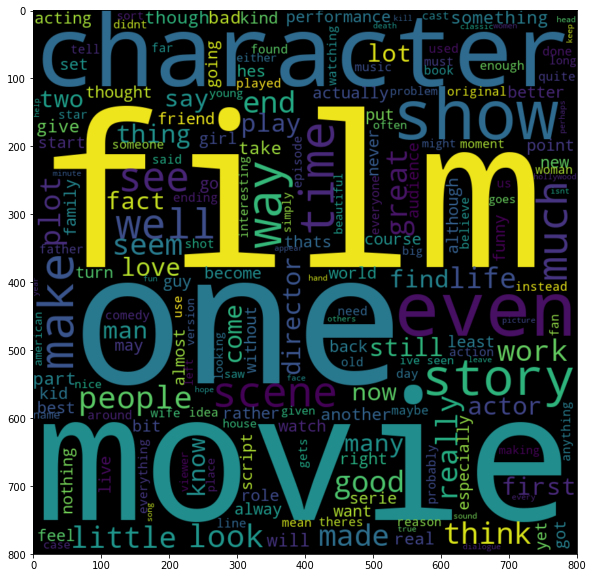

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create the wordcloud object
wordcloud_train = WordCloud(width=800, height=800, margin=0).generate(str(tokens_list_train))
# Display the generated image:
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.show()

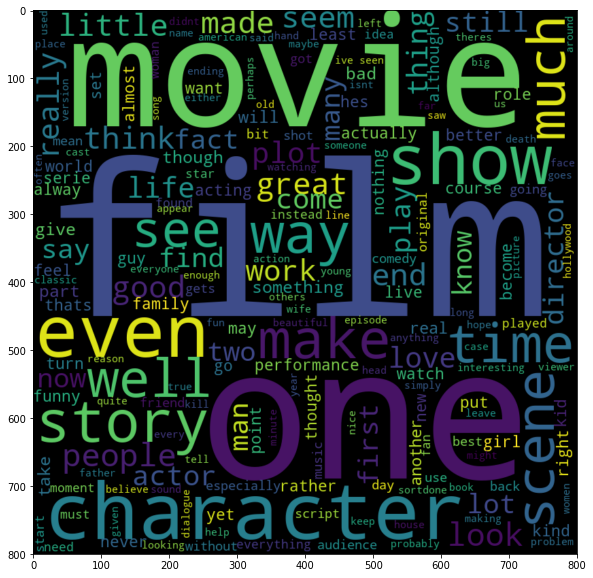

In [49]:
wordcloud_test = WordCloud(width=800, height=800, margin=0).generate(str(tokens_list_test))
# Display the generated image:
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.show()

## Confusion -Matrix

In [102]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [107]:
%%time
# Compute confusion matrix

ovr.fit(train_vectorized, df_train.label.values)

CPU times: user 7.37 s, sys: 218 ms, total: 7.59 s
Wall time: 6.33 s


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [108]:
y_pred = ovr.predict(test_vectorized)
cnf_matrix = confusion_matrix(df_test.label.values, y_pred)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[11183  1317]
 [ 1585 10915]]
Normalized confusion matrix
[[0.89 0.11]
 [0.13 0.87]]


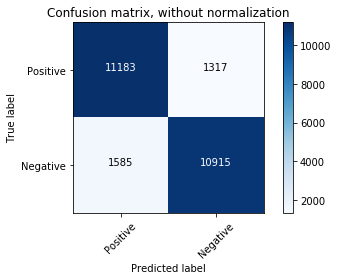

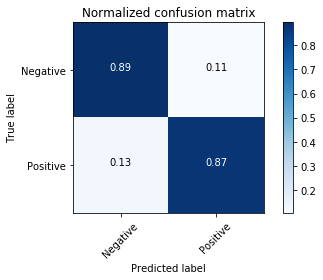

In [110]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Positive', 'Negative'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Positive'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Manually creating a function to calculate accuracy instead of using ".score" 

In [122]:
def accuracy_func(y_test, y_pred):
    acc = 0
    for y, y_hat in zip(y_test, y_pred):
        if(y == y_hat):
            acc += 1
    return acc/len(y_pred)
print(accuracy_func(df_test['label'], y_pred))

0.88392


## Confusion Matrix ..calculating [True_Positive, True_Negative, False_Positive, False_Negative]

In [132]:
def accuracy_func(y_test, y_pred):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for y, y_hat in zip(y_test, y_pred):
        if(y == 1 and y_hat == 1):
            tp += 1
        elif(y == 1 and y_hat == 2):
            fp += 1
        elif(y == 2 and y_hat == 1):
            fn += 1
        else:
            tn += 1
    print("True Positive: ", tp)
    print("True Negative: ", tn)
    print("False Positive: ", fp)
    print("False Negative: ", fn)
    Recall = (tp/(tp + fn))
    Precision = (tp/(tp + fp))
    print("Recall: ", Recall)
    print('Precision: ', Precision)
accuracy_func(df_test['label'], y_pred)

True Positive:  11183
True Negative:  10915
False Positive:  1317
False Negative:  1585
Recall:  0.8758615288220551
Precision:  0.89464


In [ ]:
''' 
    TO-DO List
    
    Random Forest
    Ensemble methods
    Word Embeding: Word2vec, glove
    
    Visualization:
    Tag Clouds
    nltk Vader
    High & low top words
    
'''